In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/embeddings.zip
/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/test.csv


In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1.DATASET 

In [39]:
df_train = pd.read_csv("../input/quora-insincere-questions-classification/train.csv")
print("Shape of train data: ", df_train.shape)
df_train.head()

Shape of train data:  (1306122, 3)


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [40]:
df_test = pd.read_csv("../input/quora-insincere-questions-classification/test.csv")
print("Shape of test data: ", df_test.shape)
df_test.head()

Shape of test data:  (375806, 2)


,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


# 2.Data analysis

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [42]:
df_train['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

# Equilibrium of the data set
Data imbalance is one of the common phenomena of binary classification problem. Before delving into the analysis of this phenomenon, we need to check the equilibrium of the data set.

Total questions:  1306122
Sincere questions: 93.81%
Insincere questions: 6.19%


Text(0.5, 1.0, 'Count of question in each category (insincere =  1)')

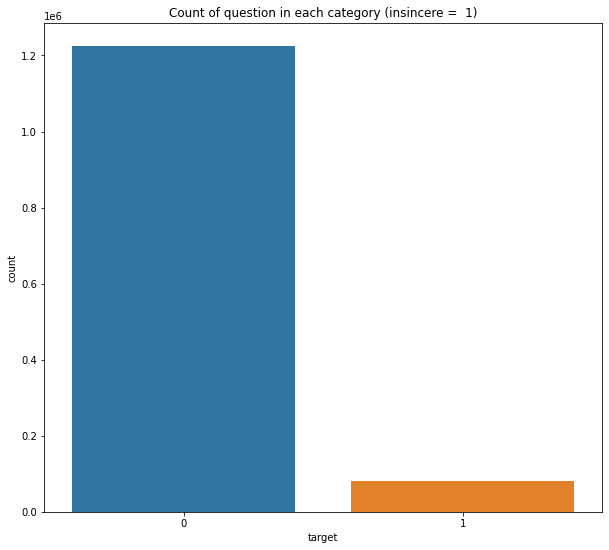

In [43]:
print("Total questions: ", df_train.shape[0])
print("Sincere questions: {}%".format(round(df_train[df_train["target"] == 0].shape[0]/df_train.shape[0]*100, 2)))
print("Insincere questions: {}%".format(round(df_train[df_train["target"] == 1].shape[0]/df_train.shape[0]*100, 2)))

plt.figure(figsize=(10,9))
sns.countplot(x='target', data=df_train)
plt.title('Count of question in each category (insincere =  1)')

The non-toxic question accounts for nearly 94%, whereby the data ratio between the two classes is about 15:1.

This is a serious imbalance that leads to inaccurate forecasting results in the minority.

# Handling data imbalance
When one side has a majority and the other a minority, there are obviously two ways to balance them out:

**Over sampling:** consists of increasing samples in minority class making it eqivalent to majority 

**Under sampling**: consists of reducing sample size by removing samples from majority class and making it equal to minority

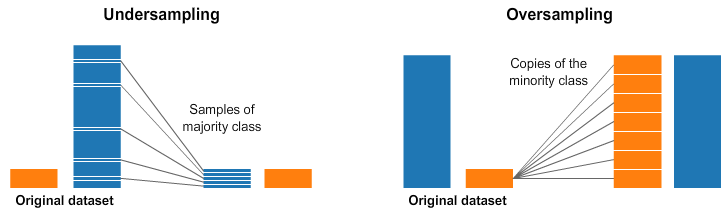!

oversampling duplicates random records from minority class which causes overfitting. In undersampling removing random records from majority class can cause loss of information.

Problem: The ratio of 50:50 on 2 classes is an equilibrium, but getting there will take a lot of data samples.

Solution: We will reduce the imbalance (1:4) so that it does not significantly affect the predictive power of the model.

In [44]:
# Class count
count_class_0, count_class_1 = df_train.target.value_counts()
count_class_0


1225312

In [45]:
count_class_1 

80810

In [46]:
sincere = df_train[df_train.target == 0]
insincere = df_train[df_train.target == 1]

# Undersampling over this dataset 

Random under-sampling:
0    80810
1    80810
Name: target, dtype: int64


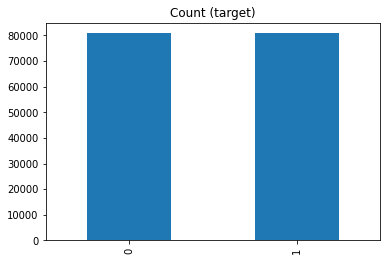

In [47]:
sincere_under = sincere.sample(count_class_1)
df_train_sampled = pd.concat([sincere_under,insincere], axis=0)
print('Random under-sampling:')
print(df_train_sampled.target.value_counts())

df_train_sampled.target.value_counts().plot(kind='bar', title='Count (target)');


In [48]:
#from sklearn.utils import resample

#sincere = df_train[df_train.target == 0]
#insincere = df_train[df_train.target == 1]
#df_train_sampled = pd.concat([resample(sincere,replace = True,n_samples = len(insincere)*4), insincere])
#df_train_sampled

# some visulaization 

In [49]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)

Word cloud of sincere questions: 


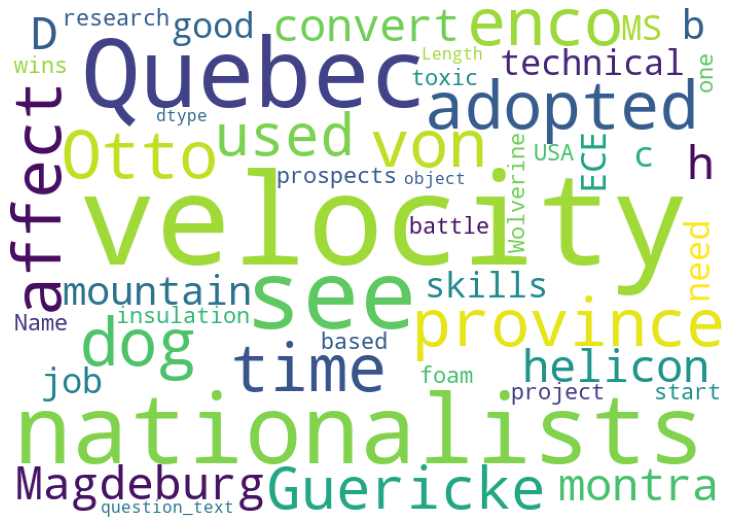

In [50]:
print("Word cloud of sincere questions: ")
sincere_wordcloud = WordCloud(width=700, height=500, background_color='white', min_font_size=10).generate(str(df_train[df_train["target"] == 0]["question_text"]))
plt.figure(figsize=(10,9), facecolor=None)
plt.imshow(sincere_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Word cloud of insincere question: 


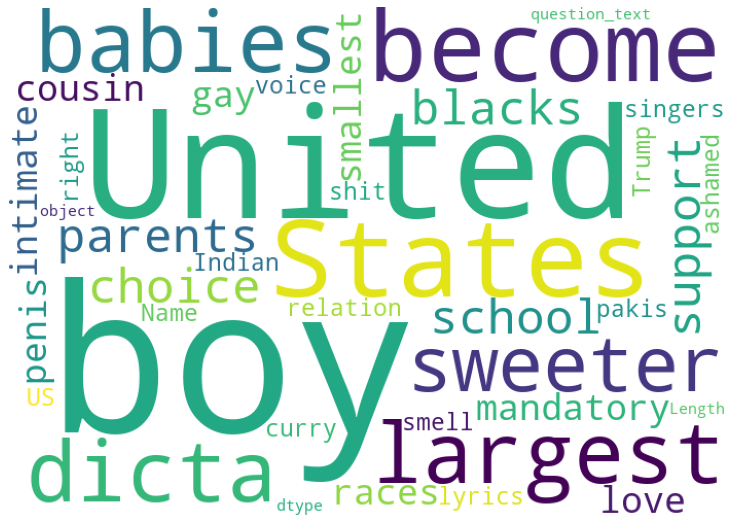

In [51]:
print("Word cloud of insincere question: ")
insincere_wordcloud = WordCloud(width=700, height=500, background_color='white', min_font_size=10).generate(str(df_train[df_train["target"] == 1]["question_text"]))
plt.figure(figsize=(10,9), facecolor=None)
plt.imshow(insincere_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [52]:
ratio = (df_train.target.sum() / df_train.shape[0]) * 100
print("Insincere question ratio: ", ratio)

Insincere question ratio:  6.187017751787352


# Preprocessing

# data cleaning and converting to vectors

In [53]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk_stopwords = stopwords.words('english')

wordnet_lemmatizer = WordNetLemmatizer()

def lemSentence(sentence):
    token_words = word_tokenize(sentence)
    lem_sentence = []
    for word in token_words:
        lem_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        lem_sentence.append(" ")
    return "".join(lem_sentence)

def clean_text(message, lem=True):
    # Remove ponctuation
    message = message.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    message = message.translate(str.maketrans('', '', string.digits))
    
    # Remove stop words
    message = [word for word in word_tokenize(message) if not word.lower() in nltk_stopwords]
    message = ' '.join(message)
    
    # Lemmatization (root of the word)
    if lem:
        message = lemSentence(message)
    
    return message

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 3))
X = vectorizer.fit_transform(df_train_sampled['question_text'])
x = vectorizer.transform(df_test['question_text'])

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# Build model

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df_train_sampled['target'], test_size=0.2, random_state=42)

In [56]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

# calculate f1-score
def get_f1(model, name):
    y_train_pred, y_pred = model.predict(X_train), model.predict(X_test)
    print(classification_report(y_test, y_pred), '\n')
    print('{} model with F1 score = {}'.format(name, f1_score(y_test, y_pred)))

# XGBoost Classifier without weigths

In [68]:
from xgboost import XGBClassifier
import xgboost as xgb1
xgb1 = xgb1.XGBClassifier(objective="binary:logistic")
xgb1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:01:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
get_f1(xgb1, 'XGBClassifier')

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     16107
           1       0.88      0.76      0.82     16217

    accuracy                           0.83     32324
   macro avg       0.83      0.83      0.83     32324
weighted avg       0.83      0.83      0.83     32324
 

XGBClassifier model with F1 score = 0.8173717906408817


# XGBoost Classifier with weigths

In [59]:
ratio = ((len(y_train) - y_train.sum()) - y_train.sum()) / y_train.sum()
ratio

0.0017029709101605438

In [60]:
import xgboost as xgb
xgb = xgb.XGBClassifier(objective="binary:logistic", scale_pos_weight=ratio)
xgb.fit(X_train, y_train)
get_f1(xgb, 'XGBClassifier')

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     16107
           1       0.94      0.00      0.00     16217

    accuracy                           0.50     32324
   macro avg       0.72      0.50      0.33     32324
weighted avg       0.72      0.50      0.33     32324
 

XGBClassifier model with F1 score = 0.0019711716151287416


# LGBM with weights 

In [61]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(n_jobs = -1, class_weight={0:y_train.sum(), 1:len(y_train) - y_train.sum()})
lgb.fit(X_train, y_train)
get_f1(lgb, 'LGBM weighted')

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     16107
           1       0.87      0.79      0.83     16217

    accuracy                           0.84     32324
   macro avg       0.84      0.84      0.84     32324
weighted avg       0.84      0.84      0.84     32324
 

LGBM weighted model with F1 score = 0.8299618690622373


# Result

In [70]:
model = xgb1
submission = pd.read_csv("../input/quora-insincere-questions-classification/sample_submission.csv")
preds = model.predict(x)
#preds
submission.loc[:, 'prediction'] = preds
submission

,qid,prediction
0,0000163e3ea7c7a74cd7,1
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [63]:
from lightgbm import *
model1 = lgb
pred_lgb = model1.predict(x)
#preds
submission.loc[:, 'prediction'] = pred_lgb
submission

,qid,prediction
0,0000163e3ea7c7a74cd7,1
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,1
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


# #Final Interpretation:-
 
 1. xgb without weight :-accuracy is 0.83
 2. xgb with weights :-accuracy is 0.50
 3. lgb :-accuracy is 0.82
    
     prediction values for test data seem to be more accurate by xgb without weight.